# Advanced Statistics

Topics covered
- Point Estimates
- Sampling distributions
- Confidence Intervals
- The Central Limit Theorem
- Hypothesis Testing
  - $T$-tests
  - $\chi^2$-test
  - $\chi^2$-test for independence

In [29]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import poisson
np.random.seed(1234)

long_breaks = stats.poisson.rvs(loc=10, mu=60, size=3000)
#represents 3000 people who take about a 60 minute break

<AxesSubplot:>

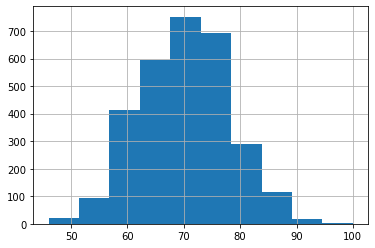

In [30]:
pd.Series(long_breaks).hist()

In [31]:
short_breaks = stats.poisson.rvs(loc=10, mu=15, size=6000)

#represents 6000 people who take about a 15 minute break

<AxesSubplot:>

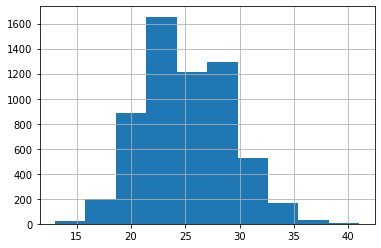

In [32]:
pd.Series(short_breaks).hist()

In [35]:
breaks = np.concatenate((long_breaks, short_breaks))

<AxesSubplot:>

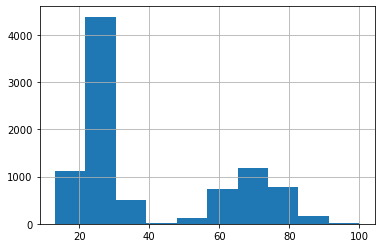

In [36]:
pd.Series(breaks).hist()

In [37]:
breaks.mean()

39.99944444444444

In [38]:
sample_breaks = np.random.choice(a=breaks, size=100)
print(sample_breaks.size)

100


In [39]:
print(breaks.mean() -  sample_breaks.mean())

-1.140555555555558


Book says this is all pretty cool that even at just over 1% of the population, we get reasonably close to the true mean

In [10]:
employee_races = (['white']*2000) + (['black']*1000) +\
                    (['hispanic']*1000) + (['asian']*3000) +\
                    (['other']*3000)
#note to self, the \ at the end of those formulas, allow us to continue on the next line
#interestingly, it throws an error if we even include comments after the \
#also note, that the multiplication operator allows us to multiply the ['race'] as many times as is multiplied by
print(len(employee_races))
#print(employee_races)

10000


In [11]:
import random
demo_sample = random.sample(employee_races, 1000) # sample 1000 values

for race in set(demo_sample): #the set function ensures that the values are not repeated, so it only loops over unique races
    print(race + ' proportion estimate:')
    print( demo_sample.count(race)/1000.)

asian proportion estimate:
0.349
black proportion estimate:
0.087
other proportion estimate:
0.304
white proportion estimate:
0.173
hispanic proportion estimate:
0.087


Notice how the proportions are very close to those in the population! :)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

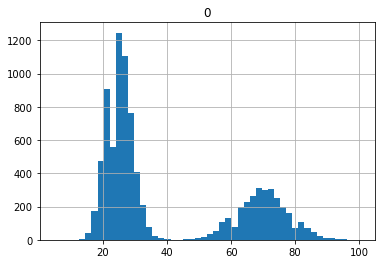

In [12]:
pd.DataFrame(breaks).hist(bins=50, range=(5,100))

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

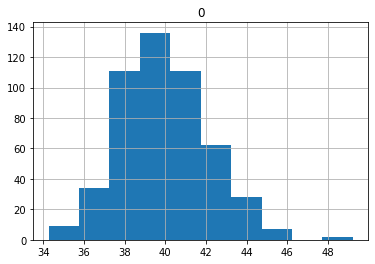

In [13]:
point_estimate=[]

for x in range(500):
    sample = np.random.choice(a = breaks, size = 100)
    point_estimate.append(sample.mean())

pd.DataFrame(point_estimate).hist()

In [14]:
breaks.mean() - np.array(point_estimate).mean()

0.04232444444443928

Look at how close the mean of the point estimates is to the population mean! This is the central limit theorem in action!!! Infact, the mean of the point estimates is much closer than the mean of the samples. In general as we increase the number of samples taken, our estimate will get closer to the parameter.

In [15]:
import math
sample_size = 100

sample = np.random.choice(a=breaks, size = sample_size)

sample_mean=sample.mean()

sample_stdev=sample.std()

sigma = sample_stdev/math.sqrt(sample_size)

stats.t.interval(alpha=0.95,
                df = sample_size - 1,
                loc = sample_mean,
                scale = sigma)


(36.29263468910625, 45.26736531089375)

The range above represents the confidence interval for the average break time with 95% confidence. Note that this includes our population parameter 39.99. Confidence interval is the percent chance that the interval will contain the population parameter.

In [16]:
# function to make confidence interval
def makeConfidenceInterval():
    sample_size=100
    sample=np.random.choice(a=breaks, size=sample_size)
    
    sample_mean=sample.mean()
    
    sample_stdev=sample.std()
    
    sigma = sample_stdev/math.sqrt(sample_size)
    
    return stats.t.interval(alpha=.95, df=sample_size-1, loc=sample_mean, scale=sigma)

To illustrate the 95% chance that the population parameter falls into the confidence intervals, we will 
1. take 10,000 confidence intervals of the sample mean
2. count the number of times the population parameter falls into our confidence intervals.
3. Output the ratio of the number of times the parameter fell into the interval by 10,000:

In [17]:
times_in_interval=0
population_mean= breaks.mean()
for i in range(10000):
    interval = makeConfidenceInterval()
    if population_mean >= interval[0] and population_mean <=interval[1]:
        times_in_interval += 1
print(times_in_interval/10000)

0.9469


And there we have it, the population mean falls into about 95% of our confidence intervals! COOL!

Next we'll take a quick look at how the size of confidence intervals changes as we change our confidence level.

In [18]:
for confidence in (.5, .8, .85, .9, .95, .99):
    confidence_interval = stats.t.interval(alpha = confidence, df=sample_size-1, loc=sample_mean, scale=sigma)
    
    length_of_interval = round(confidence_interval[1] - confidence_interval[0], 2)
    
    print ('confidence {0} has an interval of size {1}'.format(confidence, length_of_interval))

confidence 0.5 has an interval of size 3.06
confidence 0.8 has an interval of size 5.84
confidence 0.85 has an interval of size 6.56
confidence 0.9 has an interval of size 7.51
confidence 0.95 has an interval of size 8.97
confidence 0.99 has an interval of size 11.88


And *voila*, if we wish to be *more confidence* in our interval, the interval expands to compensate

Now we move into Hypothesis testing, starting with one sample *t*-tests.

Slightly different from last time: smaller sample from Poisson dist to simulate 400 from Engineering, and also smaller mean to simulate that engineering dept's break behavior isn't same as company's behaviour as whole.

In [19]:
long_breaks_in_engineering = stats.poisson.rvs(loc=10, mu=55, size=100)

short_breaks_in_engineering = stats.poisson.rvs(loc=10, mu=15, size=300)

engineering_breaks = np.concatenate((long_breaks_in_engineering, short_breaks_in_engineering))

print(breaks.mean())

39.99944444444444


In [20]:
print(engineering_breaks.mean())

35.44


In [21]:
t_statistic, p_value=stats.ttest_1samp(a=engineering_breaks, popmean=breaks.mean())

In [22]:
print (t_statistic)
print (p_value)

-4.90084434978126
1.3902828671063967e-06


Here the *p*-value is MUCH lower than 0.05 (chosen significance level) and so we reject the Null hypothesis. This means the engineering department seems to take different break lengths than the company as a whole.

- **false positive or Type I Error** is when we reject the null hypothesis when it is actually true (accept alternative when false)
- **false negative or Type II Error** is when we fail to reject the null hypothesis when it is actually false (reject alternative when its true)

In [26]:
#running Chi-square test to assess whether obesity proportions in US
#have changed since 2009
import math

observed = [102, 178, 186, 34]
expected = [156, 165.5, 147, 31.5]

chi_squared, p_value = stats.chisquare(f_obs=observed, f_exp = expected)

print(chi_squared, p_value)

30.1817679275599 1.26374310311106e-06


Since our $p$ value is lower than 0.05; therefore we may reject the null hypothesis in favor of the fact that the BMI trends today are different from what they were in 2009

In [27]:
#recall the A/B testing we did in the last chapter:
observed = np.array([[97,74], [84, 91]])
#built 2x2 matrix as seen the table

chi_squared, p_value, degrees_of_freedom, matrix = stats.chi2_contingency(observed = observed)

In [28]:
print(chi_squared, p_value)

2.30116003665059 0.1292774163199921


above our $p$-value is larger than .5 so we fail to reject the null hupothesis and we cannot say for sure that seein ga particular website has any effect on whether or not a user signs up. There is no association between these variables